# Holdout validation

**Author: [Kevin Broløs](https://abzu.ai/team)**

In this notebook we'll talk about splitting your dataset into a Train and Test set (also called a holdout set).

We'll also talk about the benefit of multiple splits for hyperparameter search, using simple models.

In [1]:
from sklearn.datasets import load_iris
from IPython.display import display
from sklearn import model_selection
import numpy as np

import matplotlib.pyplot as plt

random_state = 42 # For convenience and reproducibility in results. Don't do this in production
np.random.seed(random_state)

In [2]:
iris=load_iris()
data, feature_names = iris.data, iris.feature_names
target, target_names = iris.target, iris.target_names

## On Shuffling

You should (almost) always shuffle your dataset when splitting. This is done to prevent ordering of the data to influence the training, such as if all the samples of each class are in sequence, or if all the values are ordered from low to high, etc.

## Let's split the dataset

We'll use a built-in function of scikit learn to split the dataset going forward, but let's demonstrate a way that it could work if you were to implement it yourself using random sampling indices of an array and selecting according to that.

In [3]:
def split(X, y, test_size=0.3):
    """
        Takes an X input matrix and a y vector, shuffles them and returns a train/test split of each according
        to test_size
    """
    # Get the total length
    size = len(y)
    
    # Get the length at which our test set "starts".
    test_idx_start = size - int(size * test_size) # cast to integer to round it
    
    # Get a list of random permuted indices from 0-size (the same as shuffling the set)
    shuffled_indices = np.random.permutation(size)
    
    # Select the indices according to our test-split boundary defined above
    train_idx, test_idx = shuffled_indices[:test_idx_start], shuffled_indices[test_idx_start:]
    
    # Return X_train, X_test, y_train, y_test
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]    

In [4]:
X_train, X_test, y_train, y_test = split(data, target)

In [5]:
print("- train --- test -")
print(X_train.shape, "|", X_test.shape)
print(y_train.shape, "  |", y_test.shape)

print("\n---")
print("Training data classes: \n", y_train)
print("Test data classes: \n", y_test)

- train --- test -
(105, 4) | (45, 4)
(105,)   | (45,)

---
Training data classes: 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2
 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2]
Test data classes: 
 [0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1
 2 2 0 1 2 0 1 2]


## Using sklearn

This allows us to specify a random state directly, use all kinds of signatures depending on the output we prefer

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.3, random_state=random_state, shuffle=True)

print("- train --- test -")
print(X_train.shape, "|", X_test.shape)
print(y_train.shape, "  |", y_test.shape)

print("\n---")
print("Training data classes: \n", y_train)
print("Test data classes: \n", y_test)

- train --- test -
(105, 4) | (45, 4)
(105,)   | (45,)

---
Training data classes: 
 [1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0
 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1
 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]
Test data classes: 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


## On stratification

For classification problems, we can also choose to **stratify** our train/test split.

This serves the purpose of ensuring that the ratio of each classes are kept even in both splits, so we don't end up overrepresenting some classes over the others, as compared to what we're testing against

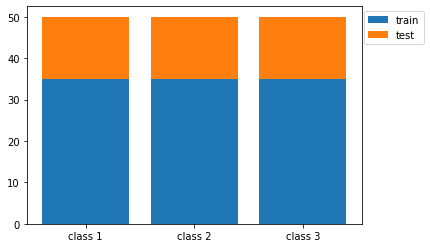

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.3, random_state=random_state, shuffle=True, stratify=target)

_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)

plt.bar(['class 1', 'class 2', 'class 3'], train_counts, label='train')
plt.bar(['class 1', 'class 2', 'class 3'], test_counts, bottom=train_counts, label='test')

plt.legend(bbox_to_anchor=(1.2, 1, 0, 0))
plt.show()

vs. non-stratified, just relying on random shuffling:

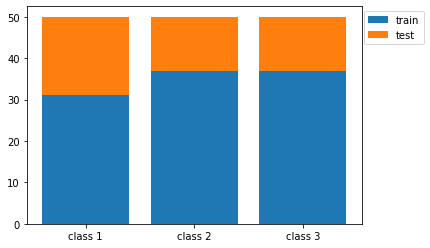

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.3, random_state=random_state, shuffle=True)

_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)

plt.bar(['class 1', 'class 2', 'class 3'], train_counts, label='train')
plt.bar(['class 1', 'class 2', 'class 3'], test_counts, bottom=train_counts, label='test')

plt.legend(bbox_to_anchor=(1.2, 1, 0, 0))
plt.show()

# Validation sets

Typically when doing any kind of machine learning, you'll want a holdout set to verify your final results.

Sometimes, if you're tuning parameters, you still want to get an indication of how well your model generalizes, without compromising your holdout set. Even if it's you doing the job, you're still leaking information between the holdout and train sets, if you use your score on the holdout set to determine what parameters to tune.

That's why we would normally also take the **train** set from before, and either split once more for a **train/validation** split (or for more automated processes, do a K-fold as we'll see later)

Some machine learning models allow to do this split for you automatically, such as keras, which we'll use in part 2.

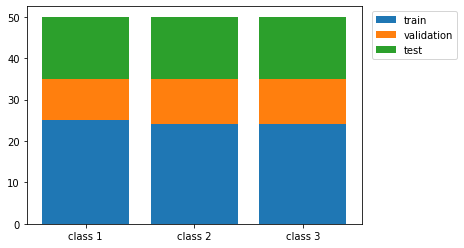

In [9]:
# Instead of relying on our previous split, I'm doing it all again to avoid contaminating our global scope variables.

X, X_test, y, y_test = model_selection.train_test_split(data, target, test_size=0.3, random_state=random_state, shuffle=True, stratify=target)
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.3, random_state=random_state, shuffle=True, stratify=y)

_, train_counts = np.unique(y_train, return_counts=True)
_, val_counts = np.unique(y_val, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)

plt.bar(['class 1', 'class 2', 'class 3'], train_counts, label='train')
plt.bar(['class 1', 'class 2', 'class 3'], val_counts, bottom=train_counts, label='validation')
plt.bar(['class 1', 'class 2', 'class 3'], test_counts, bottom=train_counts+val_counts, label='test')

plt.legend(bbox_to_anchor=(1.3, 1, 0, 0))
plt.show()
